### Exercise 1

The sin function can be evaluated through a polynomial expansion:

\begin{equation}
    \sin(x) \approx S(x,n) = \sum_j^n (-1)^j \frac{x^{2j+1}}{(2j+1)!}
\end{equation}

Plot the quality of the approximation considering $n =8, 12, 16, 24$ for $x$ in the range $[0,4\pi]$. Label each line such that they appear in a two-column legend. Redo the plot by putting each approximation a standalone subpanel.
(Hint1: you can define the function factorial or use an already coded one. Hint2: set the limits properly)

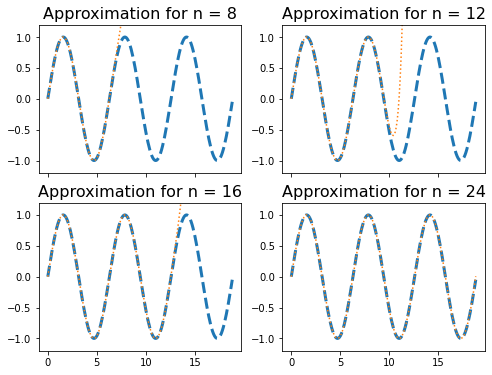

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

#let's code a function that uses the vectorized properties
# of numpy instead of an explicit for-cycle:
def s(x,n):
    j=np.arange(0,n+1,1,dtype=int)
    jj=j.reshape((len(j),1))
    xx=x.reshape((1,len(x)))
    temp=np.power(-1,jj)*np.power(xx,2.*jj+1)/factorial(2.*jj+1)
    return temp.sum(axis=0)

n=np.array([8,12,16,24])
x=np.arange(0,6*np.pi,0.1)
fig,ax=plt.subplots(2,2,figsize=(8,6),sharex=True)
# let's also show how differently the desired function is approximated
# depending on the order n of expansion that is being used:
for k in range(4):
    offset=k
    i=offset % 2
    offset=offset//2
    j=offset
    ax[j][i].set_title("Approximation for n = "+str(n[k]),fontsize=16)
    ax[j][i].plot(x,np.sin(x),'--',linewidth=3)
    ax[j][i].plot(x,s(x,n[k]),':')
    ax[j][i].set_ylim(-1.2,1.2)
    ax[j][i].tick_params(labelsize=10)


### Exercise 2

Consider the function

$$f(x) = \sin^2(x)/x^2.$$

Plot the function following these guidelines:
- Plot the function in the interval $[0,2\pi]$ with a red line and line width of 2; use a log scale for the $y$ axis and set limits between 0.0001 and 1.
- The envelope of the function is given by the $x^{-2}$. Draw it with a blue dashed line with the same thickness of the red line.
- Give a legend to both functions.
- Set $\omega$ for the $x$ axis label and $f(\omega)$ for the $y$ axis label.
- Fill the area between the red curve and the blue envelope with a yellow background (hint: use fill_between function, see doc).
- Annotate the blue curve with $\propto \omega$ (hint: use annotate function, see doc).
- Save the figure as pdf file.

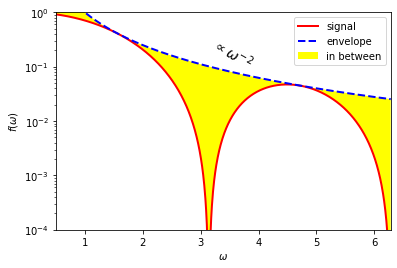

In [61]:
import numpy as np
import matplotlib.pyplot as plt
# first, let's create the data we want to plot
x  = np.linspace(1e-6,2*np.pi,1000)
# I've been careful enough not to include 0 itself into the desired
# interval because the following line of code includes a division by x
# and because of the logarithmic scale we later want to set
y1 = (np.sin(x)/x)**2
y2 = x**-2
# I can then plot the functions
plt.plot(x,y1,c='red',lw=2,label='signal')
plt.plot(x,y2,c='blue',lw=2,ls='--',label='envelope')
plt.fill_between(x,y1,y2,facecolor='yellow',label='in between')
# I then set the logarithmic scale scale and tweak the axes limits
plt.yscale('log')
plt.ylim([1e-4,1])
plt.xlim([5e-1,2*np.pi])
plt.xlabel(r'$\omega$')
plt.ylabel(r'$f(\omega)$')
plt.legend(loc='upper right')
# to ultimately annotate the desired text onto the plot
plt.annotate(text=r'$\propto\omega^{-2}$',xy=(np.pi,0.09),rotation=-30,fontsize=14)
plt.savefig('filled_area.pdf',dpi=500)

### Exercise 3

Read the file "planets.dat" using numpy (use genfromtxt). Given the mixed types, use a structured array with the following structure:

- planet name
- planet mass (jupyer masses)
- planet period (days)
- discovery year
- planet semi-major axis (AU)
- stellar mass (solar masses)
- discovery method

**dtype=np.dtype([("pl_name",'U30'),("pl_bmassj",float),("pl_orbper",float),("disc_year",int),("pl_orbsmax",float),("st_mass",float),("discoverymethod",'U30')])**

Using matplotlib produce:
- an histogram of planet masses (jupyter masses) and of star masses (solar masses). (Hint: linear scale may not be optimal; also you may want to have the same mass units);
- a scatter plot of planet mass vs orbital period, in which points are color coded according to different discovery methods;
- a plot (bar plot or histogram) with the number of discoveries vs year and the cumulative number of discoveries vs year. Then divide each discovery according to the method and produce a stacked plot.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# let's first generate the data type to store the informations into
planet_type=np.dtype([("planet_name",'U30'),("planet_mass",float),
                ("orbital_period",float),("discovery_year",int),
                ("semi_major_axis",float),("stellar_mass",float,),
                ("discovery_method",'U30')])
# units: [planet_mass]=Jupyter/Jovian masses=, [orbital_period]=days,
# [semi_major_axis]=AU, [stellar_mass]=solar masses
# I can then read the given file
dd=np.genfromtxt('planets.dat',dtype=planet_type) 

Text(0, 0.5, 'frequency $f$')

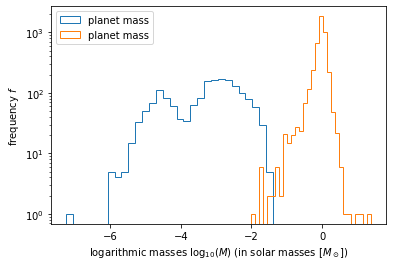

In [14]:
# 1
# to make two histograms, one of the planet masses
# and one of the star masses
fig,ax=plt.subplots()
# before that, I need to switch one of the sets int
# the same unit of measurement (solar masses) in order 
# as the other one, to be able to confront them:
# to do that, I used the following conversion
# 1 solar mass = 1048 jupyter mass
# also, because of the huge range of variation of the masses,
# I'm going to use a log-log plot
ax.hist(np.log10(dd["planet_mass"]/1048),bins=30,
       histtype='step',label='planet mass')
ax.hist(np.log10(dd["stellar_mass"]),bins=30,
       histtype='step',label='planet mass')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel(r"logarithmic masses $\log_{10}(M)$ (in solar masses $[M_\odot]$)")
ax.set_ylabel(r"frequency $f$")

Text(0, 0.5, 'planet mass $M [M_j]$')

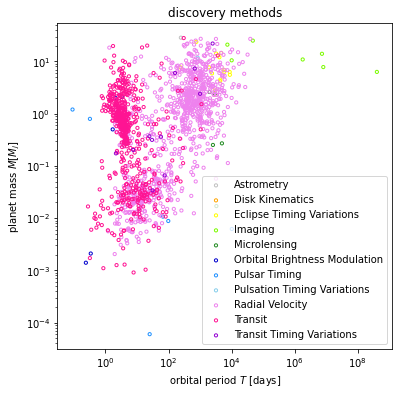

In [15]:
# 2
# let's now focus on the scatter plot
# in order to later have the distinction between discovery methods
# in the scatter plot, I need to isolate the types of methods
methods=np.unique(dd['discovery_method'])
# I then polish the names of the types I found in order 
# to later display them beautifly
methods_label=[m.replace("_"," ") for m in methods]
# for the same reason, I initialize a vector with
# color identifiers to 
colors=['silver','orange','yellow','lawngreen','forestgreen','mediumblue',
        'dodgerblue','skyblue','violet','deeppink','darkviolet']
fig2,ax2=plt.subplots(figsize=(6,6))
ax2.set_title('discovery methods')
for i,temp  in enumerate(methods):
    bm=dd["discovery_method"]==temp
    ax2.scatter(dd["orbital_period"][bm],dd["planet_mass"][bm],
               s=10,facecolors='none',edgecolors=colors[i],
                label=methods_label[i])
    
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend(fontsize=10,ncol=1,loc='lower right')
ax2.set_xlabel(r"orbital period $T$ [days]")
ax2.set_ylabel(r"planet mass $M [M_j]$")
    

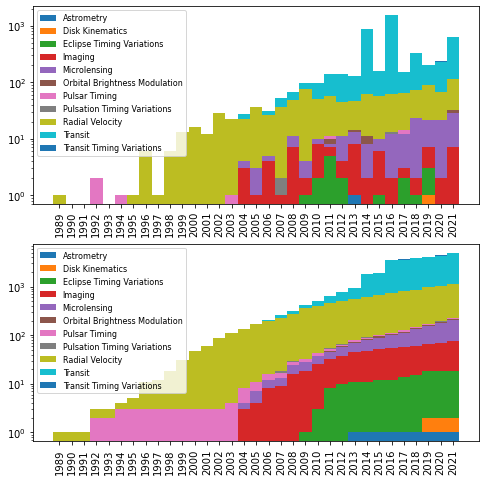

In [42]:
# 3
# let's first isolate the first and the last year in 
# which the registered planets were discovered:
min_year=min(dd["discovery_year"])
max_year=max(dd["discovery_year"])
# I can then produce the bin vector
bins=np.arange(min_year,max_year+1,1)
# and also the value of the ticks for the plot
ticks=[r"{\bf "+str(i)+"}" for i in bins]
# I then want plot both the number of discoveries per
# year and the cumulative number of discoveries per year
fig3,ax3=plt.subplots(2,1,figsize=(8,8))
# first, I need to extract and separate the data 
# depending on the discovery method
discovery_year=[]
for m in methods:
    bm=dd["discovery_method"]==m
    discovery_year.append(dd["discovery_year"][bm])
# let's finally plot
ax3[0].hist(discovery_year,bins=bins,stacked=True,
            label=methods_label,align='left')
ax3[0].set_yscale('log')
# let's focus a bit on the xticks labels, which need to
# be rotate to be more readable
ax3[0].set_xticks(bins[:-1])
plt.setp(ax3[0].get_xticklabels(),rotation=90,
         fontsize=8)
ax3[0].legend(fontsize=8)
ax3[0].tick_params(labelsize=10)

# I follow the same steps for the second plot, which
# contains the correspondive cumulative plot
ax3[1].hist(discovery_year,bins=bins,stacked=True,
            cumulative=True,label=methods_label,
            align='left')
ax3[1].set_yscale('log')
ax3[1].set_xticks(bins[:-1])
plt.setp(ax3[1].get_xticklabels(),rotation=90,
         fontsize=8)
ax3[1].legend(fontsize=8)
ax3[1].tick_params(labelsize=10)

### Exercise 4

Sample $10^6$ points $(x_1,x_2)$ from a bi-variate Gaussian distribution (hint: use multivariate_normal from numpy random)

$P(X_1, X_2) = \frac{1}{2\pi\sigma_1 \sigma_2 \sqrt{1-\rho^2}} {\rm e}^{-\frac{z}{2(1-\rho^2)}}$

where

$z = \left[\left({\frac {x_1-\mu_{1}}{\sigma_{1}}}\right)^{2}-2\rho \left({\frac{x_1-\mu_{1}}{\sigma_{1}}}\right)\left({\frac {x_2-\mu_{2}}{\sigma_{2}}}\right)+\left({\frac {x_2-\mu_{2}}{\sigma_{2}}}\right)^{2}\right]$

while $\rho$ represent the correlation between $X_1$ and $X_2$ and enters the correlation matrix

\begin{equation}
    \Sigma = 
    \begin{pmatrix}
        \sigma_1^2 & \rho \sigma_1 \sigma_2\\
        \rho \sigma_1 \sigma_2 & \sigma_2^2
    \end{pmatrix}.
\end{equation}

First choose the following values: $\mu_1 = 2, \mu_2 = 0.5, \sigma_1 = 0.5, \sigma_2 = 0.3, \rho = 0$. Then check with a non-zero $\rho$.

Plot the sampling in a 2-d histogram (hint: use hist2d from matplotlib).
As a second step add contour lines together with their inline labels (hint: use contour)

### Exercise 5

Take $a = 0.57$. Considering a 2-d cartesian reference frame and a circle with radius $a$ with center in $y = -a$. Draw the circle using a red line.

Take 24 points on that circle. Draw them as black points. 
Draw several circles passing through the origin $O = (0,0)$ and with centers on each of the other 23 points. Use a thinner orange line.
Which kind of curve do you obtain if you draw the envelope of all circles? Draw it (look for the analytical formula!) and numerically compute the area through a Monte Carlo sampling. Compare what you get with the analytical result.

I found out (from https://mathworld.wolfram.com/Cardioid.html) that the **parametric equations for a cardioid** (with a vertical axis, centered in the origin $(0,0)$) are:
\begin{cases}
\begin{matrix}
x=a' \cdot \sin(\phi) \left[ 1-\cos(\phi) \right] \\
y=a' \cdot \cos(\phi) \left[ 1-\cos(\phi) \right]
\end{matrix}
\end{cases}
In my particular case, $a'=2a$. 

Instead, the Cartesian equation of the cardioid is
$$ (x^2+y^2+a'y)^2 \leq a'^2(x^2+y^2) \Leftrightarrow (x^2+y^2+a'y)^2 - a'^2(x^2+y^2) \leq 0 $$
where still $a'=2a$. 
The theoretical area of the cardioid is the:
$$ A=\frac{2}{3}\pi (2a)^2 $$

the estimated value for the cardioid area is 6.097860000000001 while the theoretical value is 6.124220718907942


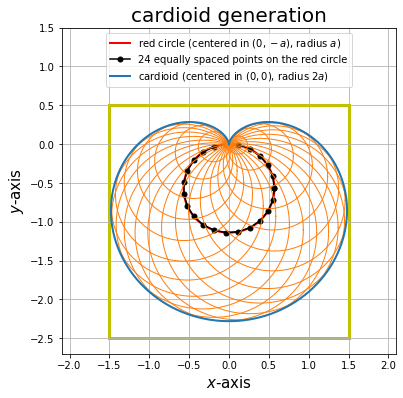

In [157]:
import numpy as np
import matplotlib.pyplot as plt
# let's first build a quick circle function
def circle_function(radius,angle,x_offset,y_offset):
    x=x_offset+radius*np.cos(angle)
    y=y_offset+radius*np.sin(angle)
    return x,y
# then, I inizialize the radius and the angle range 
# that I'm going to need to represent the circle
a=0.57 # radius
phi_circle=np.linspace(0,2*np.pi,1000) # angle range
# then I get the cartesian coordinates of the points
# of the circle
x_circle,y_circle=circle_function(a,phi_circle,0,-a)
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.plot(x_circle,y_circle,'r',lw=2,
        label=r'red circle (centered in $(0,-a)$, radius $a$)')

# similarly, I draw the 24 points of the circle:
n_points=24
phi_points=np.linspace(0,2*np.pi,n_points)
x_points,y_points=circle_function(a,phi_points,0,-a)
ax.plot(x_points,y_points,'k',marker='.',markersize=10,
        label=str(n_points)+r' equally spaced points on the red circle')

# let's now focus on drawing the 23 remaining circle
# that need to contain the origin (0,0) and be centered
# in one of the 23 other points that we just drew
radiuses=np.sqrt(x_points**2+y_points**2)
x=np.zeros((n_points,len(phi_circle)))
y=np.zeros((n_points,len(phi_circle)))
for idx in range(n_points-1):
    x[idx+1][:],y[idx+1][:]=circle_function(radiuses[idx+1],phi_circle,x_points[idx+1],y_points[idx+1])
    ax.plot(x[idx+1][:],y[idx+1][:],lw=1,color='tab:orange')

# I now define the function for the proper parametric
# coordinates of the cardioid
def cardioid_function(radius,angle):
    x=radius*np.sin(angle)*(1-np.cos(angle))
    y=radius*np.cos(angle)*(1-np.cos(angle))
    return x,y
x_cardioid,y_cardioid=cardioid_function(2*a,phi_circle)
ax.plot(x_cardioid,y_cardioid,lw=2,color='tab:blue',
        label=r'cardioid (centered in $(0,0)$, radius $2a$)')

# lastly, I polish the look of the plot
ax.set_xlim(-4.2/2,4.2/2)
ax.set_ylim(-2.7,1.5)
ax.grid('major')
ax.set_xlabel(r'$x$-axis',fontsize=15)
ax.set_ylabel(r'$y$-axis',fontsize=15)
ax.set_title('cardioid generation',fontsize=20)
ax.legend(fontsize=10,loc='upper center')

import matplotlib.patches as patches
# to compute the area of the previously mentioned 
# cardioid, I can use the following observations:
# all the points belonging to the cardioid belong also
# to a square with corners:
# (-1.5,-2.5) (+1.5,-2.5) (-1.5,0.5) (+1.5,0.5)
# which side is 3.5 units long and we can be
# quickly represented
square=patches.Rectangle((-1.5,-2.5), 3,3,
                          linewidth=3, edgecolor='y', facecolor='none')
ax.add_patch(square)
ax.legend(fontsize=10,loc='upper center')
# the Monte-Carlo fashion to find the area of the 
# cardioid is based on generating a huge amount of
# uniformly distributed points in the yellow
# square (whose area is known) and counting how many
# of them fall inside the equation of the cardioid
n_test=100000
x_test=np.random.rand(n_test)*3-1.5
y_test=np.random.rand(n_test)*3-2.5
bm=((x_test**2+y_test**2+2*a*y_test)**2-4*a**2*(x_test**2+y_test**2))<=0
#ax.plot(x_test[bm],y_test[bm],'.k')
bm=np.array([float(i) for i in bm])
prob=bm.sum()/n_test
# we know that the area of the circle is 3*3=9, so that
# the area of the cardioid can be extimated by
# moltiplying the probability for the area of the circle
cardioid_area_estimated=prob*9
cardioid_area_theoretical=3/2*np.pi*(2*a)**2
print('the estimated value for the cardioid area is '+str(cardioid_area_estimated)+' while the theoretical value is '+str(cardioid_area_theoretical))

### Exercise 6

Take the value $c$ of the area you got in exercise 7. Then consider the complex number $d = -c/(7.1862150) - 0.23 i$ as the constant in the function $f(z) = z^2 + d$. This function is very popular as it generates Julia fractals (https://en.wikipedia.org/wiki/Julia_set) when iterating recursively $z \rightarrow z^2+d$. Fix some $R > 0$ large enough that $R^2 - R \geq |d|$, this fix a convergence radius. Survey several $z$ in the complex plane. For each of them, when during the iterations the modulus of $z$ exceeds $R$ break the iteration and record the iteration number. Draw the resulting map of the complex plane by color coding each pixel with the iteration number. (Hints: for the plot you can use tools in matplotlib, e.g. imshow)

### Exercise 7

Consider the image *Christimas.png* with resolution 1240x1600. **Matplotlib.image** can open images in a very straightforward way:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


image = mpimg.imread('christmas.png')

print(image.shape)

(1600, 1240, 4)


We get a 3-D array, where the first two dimensions pertain to the pixel size, while the third contains the information about each pixel. In particular we have four values for RGBA image, where the first three are the R G B contribution, while the fourth A denotes the transparency. Since the image is in black and white you can see that the R G B number are all equal, and A is 0 or 1. 

Open the image with a visual editor, as you can see the image is formed by two nearly identical sub-images. Spot the differences between the two sub-images. Proceed as follows:

- plot the image with matplotlib.imshow
- crop the borders (hint: you can easily use numpy slicing. Also remind that the first two indices define the width and height of the image!) and remove the A parameter, i.e. you have to create a new image where the shape is (x,y,3).
- divide the two sub-images into two different objects, beware that these have the same dimension!
- plot the difference and check if the differences are highlighted.